In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A2.1

In [105]:
data = pd.DataFrame(
    {
        "x1": np.array([0, 2, 4, 4, 6, 1]),
        "x2": np.array([2, 0, 2, 4, 1, 2]),
        "class_label": np.array([1, 1, 0, 0, 0, 0])
    }
)
y_train = data["class_label"]
data.pop("class_label")
x_train = data

In [106]:
from sklearn import svm
model = svm.SVC(kernel='linear') #, degree=1)
model.fit(x_train, y_train)

SVC(kernel='linear')

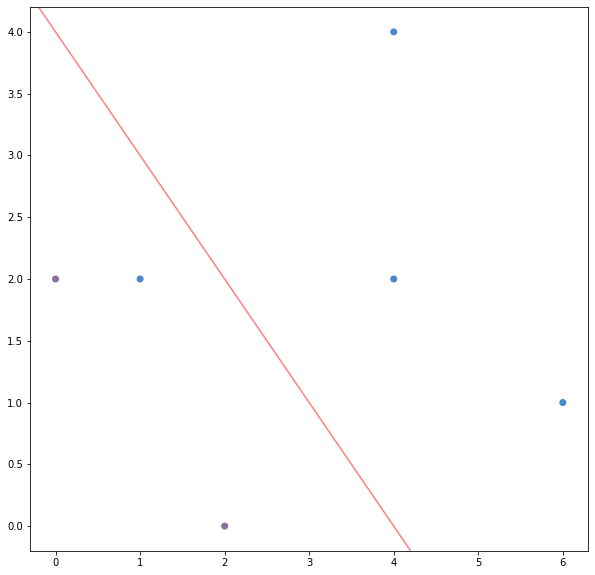

In [107]:
fig, ax = plt.subplots(figsize=(10, 10))

# Assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')

# Plot the dataset
ax.scatter(data['x1'], data['x2'], c=colors)

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 10)
yy = np.linspace(ylim[0], ylim[1], 10)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.show()

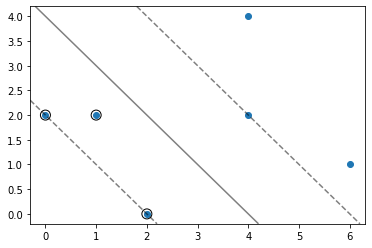

In [108]:
from sklearn.datasets import make_blobs

X, y = data['x1'], data['x2']

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

plt.scatter(X, y)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## A2.3

In [133]:
def replace_label(df):
    i = 0
    for label in df["labels"]:
        if label == "A":
            df["labels"][i] = 1
        if label == "E":
            df["labels"][i] = -1
        i += 1
    return df

In [161]:
train_set = pd.read_csv("RestrictedLettersTrain.csv")
test_set = pd.read_csv("RestrictedLettersTest.csv")
validation_set = pd.read_csv("RestrictedLettersValid.csv")

X_train = train_set.drop("labels", axis=1)
y_train = pd.DataFrame(data=train_set["labels"], columns=["labels"])
y_train = np.array(replace_label(y_train))

X_test = test_set.drop("labels", axis=1)
y_test = pd.DataFrame(data=test_set["labels"], columns=["labels"])
y_test = np.array(replace_label(y_test))

X_validation = validation_set.drop("labels", axis=1)
y_validation = pd.DataFrame(data=validation_set["labels"], columns=["labels"])
y_validation = np.array(replace_label(y_validation))

#train_set
# y_train

In [230]:
def perceptron(x, y, b, w_init, eta, epoch):
    """ Input:
    - labeled training dataset x (y for the label)
    - learning rate eta
    - margin b>0
    - w_init the initial weights
    - number of epoch
    Output: A weight vector w
    """
    k = 0
    i = 0
    n = len(y)
    w = w_init
    break_state = False
    while k < epoch:
        for row in range(n):
            i = k % n
            vec = np.array([1])
            vec = np.concatenate((vec, np.array(x.iloc[row])))
            
            if (np.dot(vec, w)*y[i] <= b):
                w = w + eta *vec * y[i]
           
            if (np.dot(vec, w)*y[i] > b):
                break_state = True
                break
                
        if break_state:
            break
            
        k = k + 1
    w = w_init[0] + w
    return w

In [231]:
w_init = np.zeros(X_train.iloc[1].shape[0]+1)+0.1
w_train = perceptron(X_train, y_train, 10, w_init, 1, 100)

In [232]:
X_train.iloc[1].shape[0]

11

In [238]:
[1]+np.array([w_train])

array([[-1463.8000000000002, 1.601, 1.1586, 0.6607999999999999, 0.7518,
        0.5793999999999999, 0.6137999999999999, 1.2, 0.7518,
        1.2690000000000001, 1.5448]], dtype=object)

In [240]:
x = np.array([1, 2, 3, 4, 5, 6])
x[1:]

array([2, 3, 4, 5, 6])

In [246]:
z = np.concatenate((np.array([1]), x))

In [247]:
z

array([1, 1, 2, 3, 4, 5, 6])